# Initial Model Report

**PROJECT GOAL:** Can a web users’ purchase intensions be predicted through their browsing behaviors?

In [2]:
import pandas as pd
import numpy as np

from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

plt.style.use('seaborn')
pd.set_option('display.width', 200)
pd.set_option('display.max_colwidth', 20)
pd.set_option('display.max_rows', 100)
df = pd.read_csv('https://raw.githubusercontent.com/Farisalenezy/BA-545-Project-2/master/data/online_shoppers_intention.csv?token=ANCJ6SXT5LT7KWO6T5BAVFK6TZIUY')
df.head(1).T

/opt/tljh/user/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,1
ProductRelated_Duration,0
BounceRates,0.2
ExitRates,0.2
PageValues,0
SpecialDay,0


In [13]:
#Install all dependencies needed by running the code below.
#%run ./system_check.ipynb

# Exploratory Data Analysis

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [15]:
df.shape

(12330, 18)

In [14]:
df = pd.read_csv('https://raw.githubusercontent.com/Farisalenezy/BA-545-Project-2/master/data/online_shoppers_intention.csv?token=ANCJ6SXT5LT7KWO6T5BAVFK6TZIUY')
df.head().T


,0,1,2,3,4
Administrative,0,0,0,0,0
Administrative_Duration,0,0,0,0,0
Informational,0,0,0,0,0
Informational_Duration,0,0,0,0,0
ProductRelated,1,2,1,2,10
ProductRelated_Duration,0,64,0,2.66667,627.5
BounceRates,0.2,0,0.2,0.05,0.02
ExitRates,0.2,0.1,0.2,0.14,0.05
PageValues,0,0,0,0,0
SpecialDay,0,0,0,0,0


## Making Sense of the Data

Early understanding of the data is critical in regards to model interpretation. The original dataset contained 18 columns and 12330 rows. The target variable, "Revenue" was heavily skewed, with only 15.5% of web users making a purchase during that visit. 

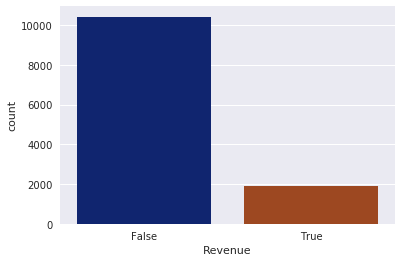

In [3]:
sns.countplot(df['Revenue'], palette='dark')

After observing the target variable, we dove into specific variables to observe how the distribution of each may affect our models.
For instance, the website was visited far more frequently during the week (M-F) and by returning visitors. It was also noteable that "region 1" was by far the most popular location for visitors.

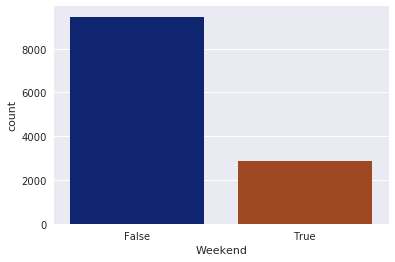

In [4]:
sns.countplot(df['Weekend'], palette='dark')

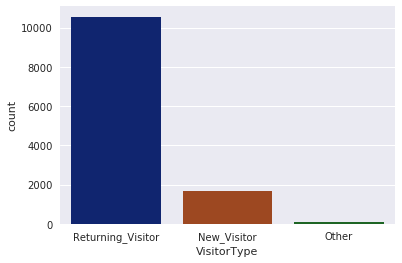

In [5]:
sns.countplot(df['VisitorType'], palette='dark')

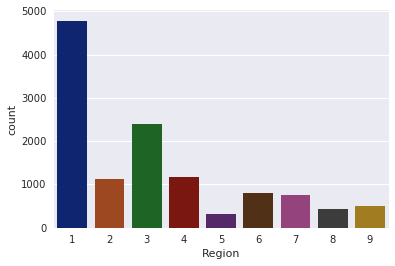

In [6]:
sns.countplot(df['Region'], palette='dark')

We then decided to run crosstab visualizations to see how certain variables compared to the target value.

It was determined that most of the website's purchases (as well as non-purchasing visits) occured in November, followed closely by May and March. This was interpreted as sales revolving around holiday times. This idea is plausable due to the high non-purchase rate in December, which could be caused by customers visiting the site to browse for gifts, but not making a purchase. Similarly, the website's highest reported Bounce and ExitRates also occured within those three months.

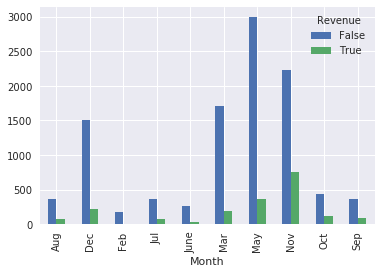

In [7]:
pd.crosstab(df['Month'],df['Revenue']).plot.bar()

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


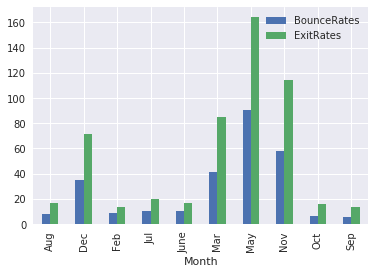

In [8]:
df.groupby(['Month'])['BounceRates','ExitRates'].sum().plot(kind ="bar")

We also noted that returning_visitors had the highest rate of non-purchases out of all the visitors. This could be explained by returning customers checking the site periodically to check for sales or specific prices. While new visitors also had a higher rate of non-purchasing, it could be inferred that as a new customer, they were referred to or sought out the website to find a specific product, not to casually browse for deals.

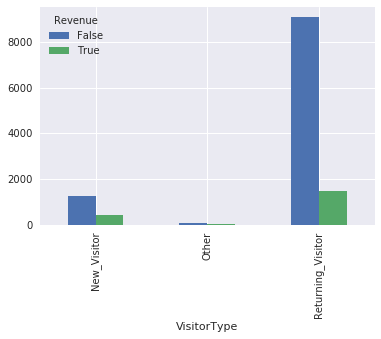

In [9]:
pd.crosstab(df['VisitorType'],df['Revenue']).plot.bar()

After observing the high occurance of region_1, we decided to see if this website's revenue also heavily flowed from the same region. However, while region_1 is more profitable than the others, it also supported the highest rate of non-purchasing visits, approximately double the amount as the second most popular region, region_3. We observed a similar pattern when grouping by Bounce and Exit Rates, with region_1 leading in both accounts.

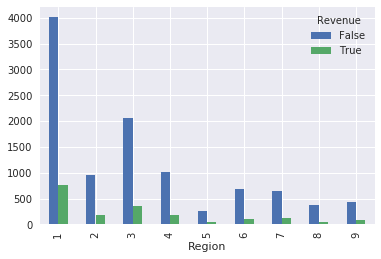

In [10]:
pd.crosstab(df['Region'],df['Revenue']).plot.bar()

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


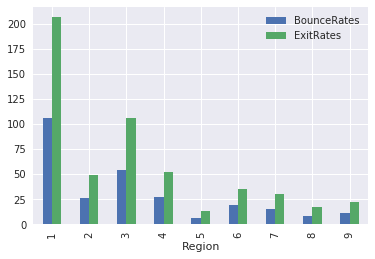

In [11]:
df.groupby(['Region'])['BounceRates','ExitRates'].sum().plot(kind ="bar")

Finally, we wanted to measure Bounce and ExitRates against our target feature. It appears that even visitors that make a purchase on the site experience a moderate ExitRate. This could be attributed to the 

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


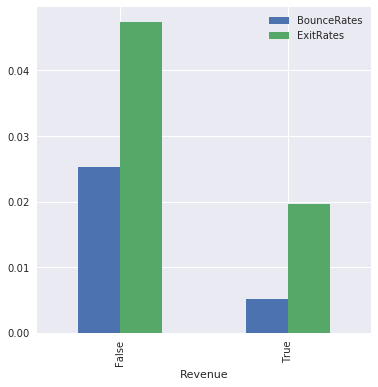

In [12]:
(df.groupby(["Revenue"])['BounceRates','ExitRates'].agg('mean')).plot.bar(figsize = (6,6))

### Checking For Missing Values

In [16]:
# source: https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe
# a function that provides a summary of the  missing values in a dataset

def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(df)

Your selected dataframe has 18 columns and 12330 Rows.
There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type


In [17]:
df.describe().round(5).T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.31517,3.32178,0.0,0.00000,1.00000,4.00000,27.00000
Administrative_Duration,12330.0,80.81861,176.77911,0.0,0.00000,7.50000,93.25625,3398.75000
Informational,12330.0,0.50357,1.27016,0.0,0.00000,0.00000,0.00000,24.00000
Informational_Duration,12330.0,34.47240,140.74929,0.0,0.00000,0.00000,0.00000,2549.37500
ProductRelated,12330.0,31.73147,44.47550,0.0,7.00000,18.00000,38.00000,705.00000
ProductRelated_Duration,12330.0,1194.74622,1913.66929,0.0,184.13750,598.93690,1464.15721,63973.52223
BounceRates,12330.0,0.02219,0.04849,0.0,0.00000,0.00311,0.01681,0.20000
ExitRates,12330.0,0.04307,0.04860,0.0,0.01429,0.02516,0.05000,0.20000
PageValues,12330.0,5.88926,18.56844,0.0,0.00000,0.00000,0.00000,361.76374
SpecialDay,12330.0,0.06143,0.19892,0.0,0.00000,0.00000,0.00000,1.00000


### Correlation

We performed a correlation matrix to see which features had a high correlation with the target, as well as the other features. This will help us in any necessary feature engineering.

list of correlation pair (Max on top):
BounceRates     ExitRates                  0.913004
ProductRelated  ProductRelated_Duration    0.860927
Informational   Informational_Duration     0.618955
Administrative  Administrative_Duration    0.601583
dtype: float64
--------------------------


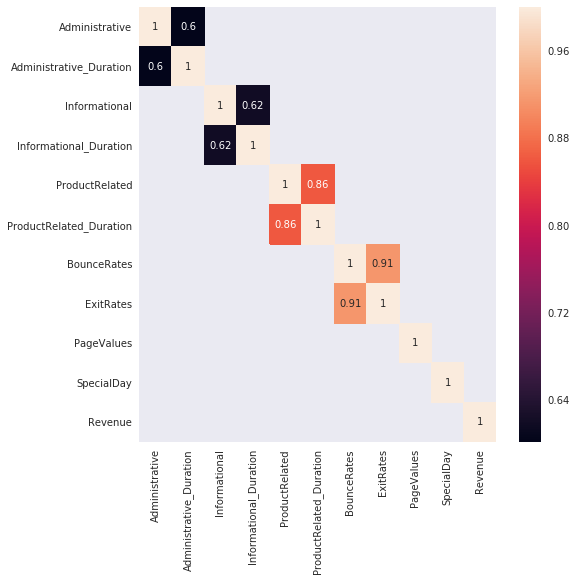

In [75]:
corr_cols =['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
            'Revenue',
           
 ]


# https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
#correlation matrix
corr_matrix = df[corr_cols].corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
corr_list = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
## prints a descending list of correlation pair (Max on top)
print('list of correlation pair (Max on top):')
print(corr_list[corr_list>= .5])
print("--------------------------")


corr_df =df[corr_cols].corr().abs()
corr_df = corr_df[corr_df >= .5]           
plt.figure(figsize= (8,8))
corr = corr_df#.round(4)
sns.heatmap(corr, annot=True)
plt.show()

__Based on our correlation matrix, we determined the pairwise of four pairs that required feature engineering. Those pairs have been highlighted in the above matrix:__

- Administrative & Administrative_Duration
- Informational & Informational_Duration
- ProductRelated & ProductRelated_Duration
- BounceRates & ExitRates

### Feature Engineering

We then took these pairwise and found the average page duration per second for Administrative, Information and ProductRelated, and the ratio between BounceRates and ExitRates. We felt that using these new features could serve better use in future feature selection processes and eliminate redundant correlating features in our modeling.

In [19]:
df["average_informational_duration"] = df['Informational_Duration']/df['Informational']
df["average_administrative_duration"] = df['Administrative_Duration']/df['Administrative']
df["average_ProductRelated_duration"] = df['ProductRelated_Duration']/df['ProductRelated']
df["average_BounceRates/ExitRates"] = (df["BounceRates"]+df["ExitRates"])/2
df.isna().sum()
df = df.fillna(0)
df.isna().sum()


Administrative                     0
Administrative_Duration            0
Informational                      0
Informational_Duration             0
ProductRelated                     0
ProductRelated_Duration            0
BounceRates                        0
ExitRates                          0
PageValues                         0
SpecialDay                         0
Month                              0
OperatingSystems                   0
Browser                            0
Region                             0
TrafficType                        0
VisitorType                        0
Weekend                            0
Revenue                            0
average_informational_duration     0
average_administrative_duration    0
average_ProductRelated_duration    0
average_BounceRates/ExitRates      0
dtype: int64

### Encoding

We changed text based features into numeric and/or binary data points such as month, season, etc.

In [20]:

months = {'JAN':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5,
     'June':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10,
     'Nov':11, 'Dec':12}

df['months'] = df.Month.map(months)
df['months'].value_counts()
seasons = ((df['months'] % 12 + 3) // 3).map({1:'winter', 2: 'Spring', 3:'summer', 4:'Fall'})
df["season"]= seasons
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType,VisitorType,Weekend,Revenue,average_informational_duration,average_administrative_duration,average_ProductRelated_duration,average_BounceRates/ExitRates,months,season
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,1,Returning_Visitor,False,False,0.0,0.000000,0.000000,0.200000,2,winter
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,...,2,Returning_Visitor,False,False,0.0,0.000000,32.000000,0.050000,2,winter
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,3,Returning_Visitor,False,False,0.0,0.000000,0.000000,0.200000,2,winter
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,...,4,Returning_Visitor,False,False,0.0,0.000000,1.333333,0.095000,2,winter
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,...,4,Returning_Visitor,True,False,0.0,0.000000,62.750000,0.035000,2,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,...,1,Returning_Visitor,True,False,0.0,48.333333,33.656447,0.018087,12,winter
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,...,8,Returning_Visitor,True,False,0.0,0.000000,93.150000,0.010667,11,Fall
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,...,13,Returning_Visitor,True,False,0.0,0.000000,30.708333,0.085000,11,Fall
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,...,11,Returning_Visitor,False,False,0.0,18.750000,23.066667,0.010526,11,Fall


In [21]:

dummy = [
 
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
'VisitorType' ,
    'season'
 ]

for i  in dummy:
    df[i+'_dummies'] =df[i]
#list(df.columns)
dummies_cols = [
 'OperatingSystems_dummies',
 'Browser_dummies',
 'Region_dummies',
 'TrafficType_dummies',
 'VisitorType_dummies',
 'season_dummies'
]
df= pd.get_dummies(df, prefix=None, prefix_sep='_', dummy_na=False, columns=dummies_cols,sparse=False, drop_first=False, dtype=None)
df['Weekend_binary'] = df['Weekend'].map({True:1,False:0})
df['Revenue_Y'] = df['Revenue'].map({True:1,False:0})



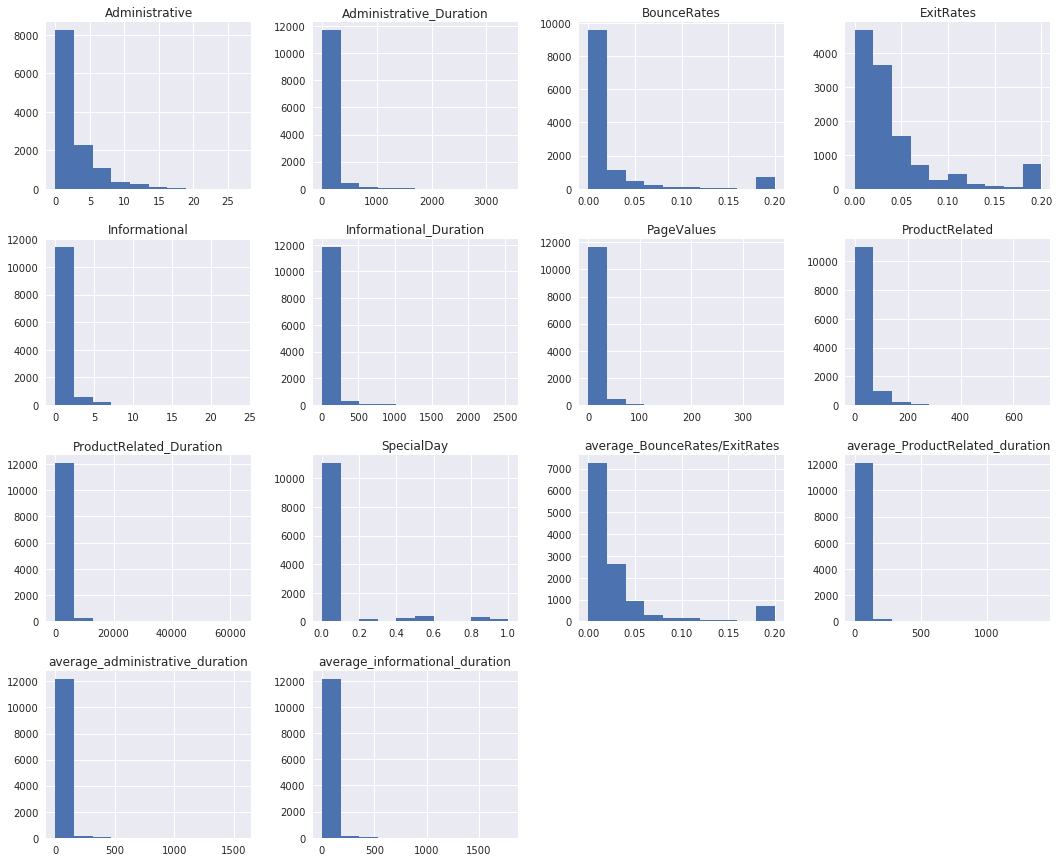

In [23]:
cols =['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
    'average_informational_duration', 
                'average_administrative_duration',
       'average_ProductRelated_duration', 'average_BounceRates/ExitRates' ,
 ]
#df[cols].hist( figsize = (35,20))

#fig, ax = plt.subplots(len(cols), figsize=(40,40))
"""df[cols].hist
#fig, ax = plt.subplots(len(cols), figsize=(10, 5))
for col_val in cols:
    
    df[col_val].plot(kind = 'hist' , title = col_val )
    #ax1.set(xlabel='Original ' + col_val)
    
    #df[col_val].hist(    color='#86bf91')

    plt.show()"""

df[cols].hist(figsize =(18,15))
plt.show()

### Determining How to Handle Outliers

Before determing what to do with outliers, we decided to look at a few scatter plots of data to get an idea of the data in relation to PageValues, the driving force leading to revenue. The scatter plots are colored based on if the data point resulted in revenue or not. These two visualizations are two we selected for the purpose of showing two examples, if you would like to referance any more you can look at the Visualization.ipynb file to see more.

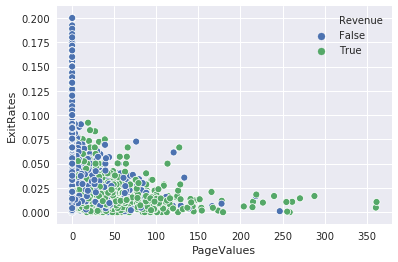

In [24]:
sns.scatterplot(x='PageValues', y='ExitRates', hue = 'Revenue', data=df) 

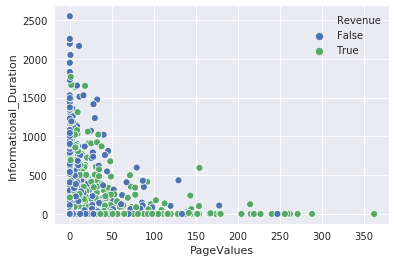

In [25]:
sns.scatterplot(x='PageValues', y='Informational_Duration',hue = 'Revenue', data=df)

When looking at the two example visualziations above, it can be seen that it is the outliers that are causing the skewness in the data. 

You can see specifically wih ExitRates in the first visualization, no revenue accrue with 0 value for PageValue. Because of this, esentially we know that there is a large amount of people that come onto the site, and choose to leave right away. Within the distribution of the data, it will create a skewnewss, however it essentially impacts the results the same way.

In the second visualization, for 0 value PageValues there are no instances of Informational Duration. There are some instances of what apears to be in the low single digits of a higher Information Duration, but for the most part this seems to be the same as the first visualization. Within the distribution of the data, it will create a skewnewss, however it essentially impacts the results the same way.

Rather than dropping these datapoints, we have determined to keep them in the data set to be used in our models because they directly effect the shape of the distribution which is relevant to how we standardize and normalize it.


### Handling Skewness


 ------------------------------------------------------

 'PageValues_skew' had 'positive' skewness of 6.38

 Transformation yielded skewness of 1.34


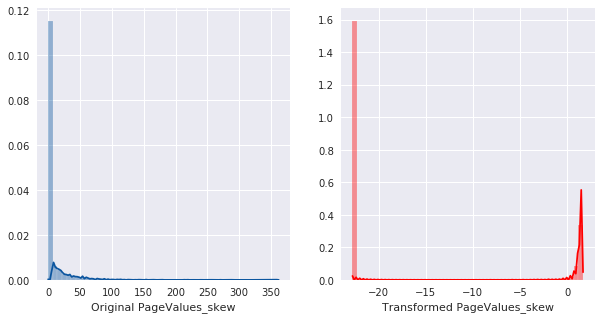


 ------------------------------------------------------

 'Informational_Duration_skew' had 'positive' skewness of 7.58

 Transformation yielded skewness of 1.54


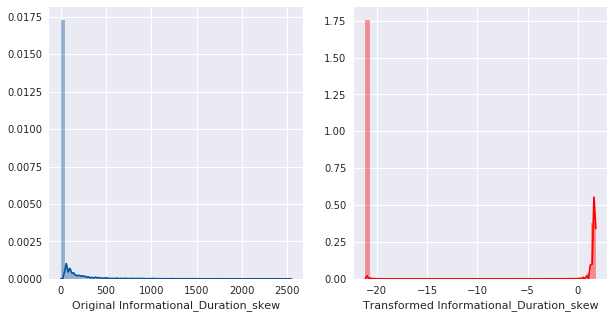


 ------------------------------------------------------

 'average_informational_duration_skew' had 'positive' skewness of 11.22

 Transformation yielded skewness of 1.54


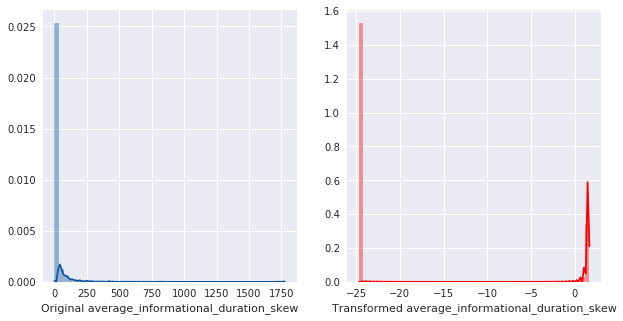


 ------------------------------------------------------

 'average_administrative_duration_skew' had 'positive' skewness of 9.42

 Transformation yielded skewness of -0.00


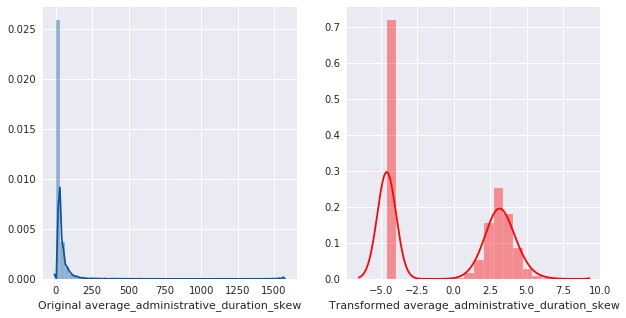


 ------------------------------------------------------

 'average_ProductRelated_duration_skew' had 'positive' skewness of 10.30

 Transformation yielded skewness of 0.21


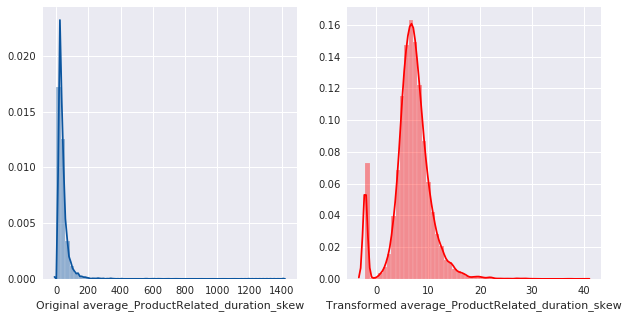


 ------------------------------------------------------

 'average_BounceRates/ExitRates_skew' had 'positive' skewness of 2.66

 Transformation yielded skewness of 0.11


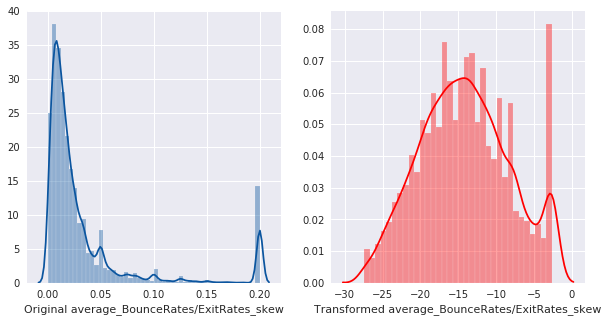

In [26]:
from skew_autotransform import skew_autotransform
skew_cols = [

 
 
 'PageValues',
 
   'Informational_Duration'  , 'average_informational_duration', 'average_administrative_duration',
       'average_ProductRelated_duration',        'average_BounceRates/ExitRates'
            ]

 
for i  in skew_cols:

    df[i+'_skew'] = df[i]
    
    
cols_to_skew = [

 
 
 'PageValues_skew' ,
 
  'Informational_Duration_skew' ,
                
                'average_informational_duration_skew', 
                'average_administrative_duration_skew',
       'average_ProductRelated_duration_skew',
                'average_BounceRates/ExitRates_skew'
               
               
               
               ]

df = skew_autotransform(df,include = cols_to_skew, plot = True, exp = False, threshold = 0.01)


**As can be seen in the above visualizations, there was a tendency for a right skewness in most features prior to normalization.**

In [27]:
cols_skew = [
'PageValues_skew'   ,   'average_informational_duration_skew', 
                'average_administrative_duration_skew',
       'average_ProductRelated_duration_skew',  'average_BounceRates/ExitRates_skew']
df[cols_skew].skew()

PageValues_skew                         1.344268
average_informational_duration_skew     1.539673
average_administrative_duration_skew   -0.003089
average_ProductRelated_duration_skew    0.208625
average_BounceRates/ExitRates_skew      0.114926
dtype: float64

### Standardization

We then use MinMaxScaler to apply standardization to the data. 

In [28]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler

min_max_col_pre = [  
                   
                  
       'PageValues_skew',   'average_informational_duration_skew', 
                'average_administrative_duration_skew',
       'average_ProductRelated_duration_skew' , 'average_BounceRates/ExitRates_skew']


for i  in min_max_col_pre:
    df[i+'_s'] =MinMaxScaler().fit_transform(df[i].values.reshape(-1, 1))
    #df[i+'_s'] =df[i]#StandardScaler().fit_transform(df[i].values.reshape(-1, 1))
    #print(df[i].value_counts())
df.describe().round(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Informational_Duration_skew,average_informational_duration_skew,average_administrative_duration_skew,average_ProductRelated_duration_skew,average_BounceRates/ExitRates_skew,PageValues_skew_s,average_informational_duration_skew_s,average_administrative_duration_skew_s,average_ProductRelated_duration_skew_s,average_BounceRates/ExitRates_skew_s
count,12330.00000,12330.00000,12330.00000,12330.00000,12330.00000,12330.00000,12330.00000,12330.00000,12330.00000,12330.00000,...,12330.00000,12330.00000,12330.00000,12330.00000,12330.00000,12330.00000,12330.00000,12330.00000,12330.00000,12330.00000
mean,2.31517,80.81861,0.50357,34.47240,31.73147,1194.74622,0.02219,0.04307,5.88926,0.06143,...,-16.71297,-19.59494,-0.52432,6.86431,-14.17586,0.21752,0.19332,0.33948,0.21476,0.53449
std,3.32178,176.77911,1.27016,140.74929,44.47550,1913.66929,0.04849,0.04860,18.56844,0.19892,...,9.00852,10.34385,3.95247,3.68132,5.88798,0.40804,0.39276,0.32986,0.08766,0.23798
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,-21.14709,-24.68637,-4.59205,-2.15517,-27.40028,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.00000,0.00000,0.00000,0.00000,7.00000,184.13750,0.00000,0.01429,0.00000,0.00000,...,-21.14709,-24.68637,-4.59205,5.24481,-18.48257,0.00000,0.00000,0.00000,0.17620,0.36043
50%,1.00000,7.50000,0.00000,0.00000,18.00000,598.93690,0.00311,0.02516,0.00000,0.00000,...,-21.14709,-24.68637,1.63120,6.88941,-14.33155,0.00000,0.00000,0.51937,0.21536,0.52820
75%,4.00000,93.25625,0.00000,0.00000,38.00000,1464.15721,0.01681,0.05000,0.00000,0.00000,...,-21.14709,-24.68637,3.19969,8.66487,-10.03787,0.00000,0.00000,0.65027,0.25764,0.70174
max,27.00000,3398.75000,24.00000,2549.37500,705.00000,63973.52223,0.20000,0.20000,361.76374,1.00000,...,1.79040,1.64997,7.39031,39.84223,-2.65836,1.00000,1.00000,1.00000,1.00000,1.00000


In [48]:
#df.to_csv("pre_online_shoppers_intention.csv")
df= pd.read_csv("https://raw.githubusercontent.com/Farisalenezy/BA-545-Project-2/master/pre_online_shoppers_intention.csv?token=ANCJ6SVPWDBARBBBLQKAEL26TZJI2")
final_cols=[ 

 'OperatingSystems_dummies_1',
 'OperatingSystems_dummies_2',
 'OperatingSystems_dummies_3',
 'OperatingSystems_dummies_4',
 'OperatingSystems_dummies_5',
 'OperatingSystems_dummies_6',
 'OperatingSystems_dummies_7',
 'OperatingSystems_dummies_8',
 'Browser_dummies_1',
 'Browser_dummies_2',
 'Browser_dummies_3',
 'Browser_dummies_4',
 'Browser_dummies_5',
 'Browser_dummies_6',
 'Browser_dummies_7',
 'Browser_dummies_8',
 'Browser_dummies_9',
 'Browser_dummies_10',
 'Browser_dummies_11',
 'Browser_dummies_12',
 'Browser_dummies_13',
 'Region_dummies_1',
 'Region_dummies_2',
 'Region_dummies_3',
 'Region_dummies_4',
 'Region_dummies_5',
 'Region_dummies_6',
 'Region_dummies_7',
 'Region_dummies_8',
 'Region_dummies_9',
 'TrafficType_dummies_1',
 'TrafficType_dummies_2',
 'TrafficType_dummies_3',
 'TrafficType_dummies_4',
 'TrafficType_dummies_5',
 'TrafficType_dummies_6',
 'TrafficType_dummies_7',
 'TrafficType_dummies_8',
 'TrafficType_dummies_9',
 'TrafficType_dummies_10',
 'TrafficType_dummies_11',
 'TrafficType_dummies_12',
 'TrafficType_dummies_13',
 'TrafficType_dummies_14',
 'TrafficType_dummies_15',
 'TrafficType_dummies_16',
 'TrafficType_dummies_17',
 'TrafficType_dummies_18',
 'TrafficType_dummies_19',
 'TrafficType_dummies_20',
 'VisitorType_dummies_New_Visitor',
 'VisitorType_dummies_Other',
 'VisitorType_dummies_Returning_Visitor',
 'Weekend_binary',
    
 
 

 'PageValues_skew_s' ,
'season_dummies_Fall',
 'season_dummies_Spring',
 'season_dummies_summer',
 'season_dummies_winter' , 
    
    'average_informational_duration_skew_s', 'average_administrative_duration_skew_s', 'average_ProductRelated_duration_skew_s', 'average_BounceRates/ExitRates_skew_s']
y_cols = ['Revenue_Y']

droppd_cols = ['BounceRates_skew_s','Administrative_skew_s', 'Informational_skew_s']
df_X = df[final_cols]
df_y = df[y_cols]

In [58]:
#https://www.featureranking.com/tutorials/machine-learning-tutorials/sk-part-2-feature-selection-and-ranking/

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from SpFtSel import SpFtSel
from sklearn.naive_bayes import BernoulliNB

X_SpF = df_X.copy()#.values

y_SpF = df_y.values.ravel() # target


#Splitting data test&train 
X_train_SpF, X_test_SpF, y_train_SpF, y_test_SpF= train_test_split(X_SpF, y_SpF, test_size=0.25, random_state=123)


from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
#sm =ADASYN(n_neighbors=20)
sm =SMOTE(k_neighbors=20)
X_train_bal, y_train_bal = sm.fit_sample(X_train_SpF,y_train_SpF)


X =  X_train_bal    #Feature Matrix
y = y_train_bal#.values.ravel()         #Target Variable

# make sure the results are repeatable
np.random.seed(8)


x =X.values#.ravel()


# specify a wrapper to use
#wrapper =  LogisticRegression(solver = 'newton-cg',max_iter = 2000  ,class_weight={0:0.2,1:0.8},random_state=123 )
wrapper =  DecisionTreeClassifier(max_depth=3,random_state=123 )
#wrapper = GradientBoostingClassifier(random_state=123,n_estimators=50,max_depth=5,min_samples_split=40)
#wrapper = BernoulliNB()
#wrapper = RandomForestClassifier()
#wrapper  =RandomForestClassifier(random_state=123,n_estimators=700,min_samples_split=60,class_weight={0:0.20,1:0.80})

# specify a metric to maximize
# (by default, sklearn metrics are defined as "higher is better")
# you need to make sure your scoring metric is consistent with your problem type,
# based on whether it is a binary or multi-class classification problem
# example: accuracy, f1, roc_auc, f1_weighted ,etc.
# more info on the scoring metrics can be found here:
# https://scikit-learn.org/stable/modules/model_evaluation.html
scoring = 'f1_weighted'

# set the engine parameters
sp_engine = SpFtSel(x, y, wrapper, scoring)

# run the engine
# available engine parameters:
# 1. num_features: how many features to select
#    (in addition to features to keep, if any)
#    default value is 0 and it results in automatic feature selection
# 2. run_mode: 'regular' (default) or 'extended'
# 3. stratified_cv: whether CV should be stratified or not (default is True)
#    stratified_cv must be set to False for regression problems
# 4. n_jobs: number of cores to be used in cross-validation (default is 1)
# 5. print_freq: print frequency for the output (default is 5)
# 6. features_to_keep_indices: indices of features to keep: default is None
sp_run = sp_engine.run(num_features=6 )#,stratified_cv = False)

# get the results of the run
sp_results = sp_run.results

# list of available keys in the engine output
print('Available keys:\n', sp_results.keys())

# performance value of the best feature set
print('Best value:', sp_results.get('best_value'))

# indices of selected features
print('Indices of selected features: ', sp_results.get('features'))

# importance of selected features
print('Importance of selected features: ', sp_results.get('importance').round(3))

# number of iterations for the optimal set
print('Total iterations for the optimal feature set:', sp_results.get('total_iter_for_opt'))
fs_indices_spsa = sp_results.get('features')

best_features_spsa = X.columns[fs_indices_spsa].values
best_features_spsa

spFtSel-INFO: Algorithm run mode: regular
spFtSel-INFO: Wrapper: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
spFtSel-INFO: Scoring metric: f1_weighted
spFtSel-INFO: Number of features: 63
spFtSel-INFO: Number of observations: 15660
spFtSel-INFO: iter: 0, value: 0.665, std: 0.011, num. features: 6, best value: 0.665
spFtSel-INFO: iter: 5, value: 0.675, std: 0.013, num. features: 6, best value: 0.681
spFtSel-INFO: iter: 10, value: 0.672, std: 0.012, num. features: 6, best value: 0.681
spFtSel-INFO: iter: 15, value: 0.882, std: 0.003, num. features: 6, best value: 0.882
spFtSel-INFO: iter: 20, value: 0.882, std: 0.00

Available keys:
 dict_keys(['_wrapper', '_scoring', 'selected_data', 'iter_results', 'features', 'importance', 'num_features', 'total_iter_overall', 'total_iter_for_opt', 'best_value', 'best_std'])
Best value: 0.883
Indices of selected features:  [54 36 37 62 20 59]
Importance of selected features:  [0.654 0.639 0.613 0.612 0.608 0.598]
Total iterations for the optimal feature set: 16


array(['PageValues_skew_s', 'TrafficType_dummies_7',
       'TrafficType_dummies_8', 'average_BounceRates/ExitRates_skew_s',
       'Browser_dummies_13', 'average_informational_duration_skew_s'],
      dtype=object)

In [59]:
# hand selected columns:
cols_picked= ['season_dummies_Fall', 'OperatingSystems_dummies_3', 'ExitRates_skew_s',
         'VisitorType_dummies_Returning_Visitor', 'TrafficType_dummies_15', 
         'TrafficType_dummies_3',  
         'TrafficType_dummies_7', 'TrafficType_dummies_18',
         'PageValues_skew_outliner_fix_s']

cols_picked_1 = ['TrafficType_dummies_14', 'PageValues_skew_outliner_fix_s',
       'OperatingSystems_dummies_3', 'Region_dummies_8',
       'season_dummies_winter', 'Browser_dummies_5']

cols_picked_2 = ['VisitorType_dummies_Other', 'season_dummies_Spring',
       'PageValues_skew_outliner_fix_s', 'Browser_dummies_4',
       'ProductRelated_skew_s', 'Browser_dummies_3']

clos = ['season_dummies_Fall', 'OperatingSystems_dummies_3', 
        'ExitRates_skew_s', 'VisitorType_dummies_Returning_Visitor', 'TrafficType_dummies_15', 'TrafficType_dummies_3']
clos_1 = ['season_dummies_Fall', 'ExitRates_skew_s', 'VisitorType_dummies_Returning_Visitor', 'OperatingSystems_dummies_3', 'TrafficType_dummies_3', 'TrafficType_dummies_15', 
          'TrafficType_dummies_7', 'TrafficType_dummies_18', 'Region_dummies_3', 'Browser_dummies_12']


cols_2 =['ProductRelated_skew_s', 'TrafficType_dummies_4',
       'Region_dummies_6', 'VisitorType_dummies_New_Visitor',
       'season_dummies_Fall', 'Weekend_binary']

In [60]:
#https://github.com/fairfield-university-ba545/project1-mtb/blob/master/Pipeline%201-zscoreadditions.ipynb
# -----------------------------------------------------------------------------------
# Y Naive model - assume all assume all of the customers didn't buy, calculate % you are right (Y=0)
# -----------------------------------------------------------------------------------

count_Y = df_y['Revenue_Y'].value_counts()
#print(count_Y)

# Calculate False values divided by the Y total observations
Y_False = round((count_Y[0]/df.index.shape[0])*100,2)

# show user what the % is that Y1 is True in the dataset
print("Revenue: If you assume all of the customers didn't buy, it would be right ", Y_False, '%', '  of the times.')


Revenue: If you assume all of the customers didn't buy, it would be right  84.53 %   of the times.


# Modeling Process

1. Logistic Regression
2. Naive Bayes
3. Decision Tree Classified

Within all three models, we will run three variations of the these models using:

-  No hyperparameters 
-  With oversampling
-  With oversampling and feature selection


#### Process Includeds

- Feature Selection
- Splitting into Testing & Training Data
- Pre-Modeling step of which and how many features to  select
- Determine what will be used for the cross-validation process



# 1- Logistic Regression

####  Logistic Regression Model 1 :
- Running the all if features except the highly correlated features (pairwise):

Classification Report for Classfier Test:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      2592
           1       0.63      0.52      0.57       491

    accuracy                           0.88      3083
   macro avg       0.77      0.73      0.75      3083
weighted avg       0.87      0.88      0.87      3083

Accuracy:0.8751
F1 (weighted): 0.8702
Precision (weighted): 0.8674
Recall (weighted): 0.8751
AUC 0.7317572791732668
model bias (f1-score): 0.6324075711552948
model variance (f1-score): 0.03159607713189605
model bias (ROC/AUC): 0.9132900504408008
model variance (ROC/AUC): 0.008219261962394009


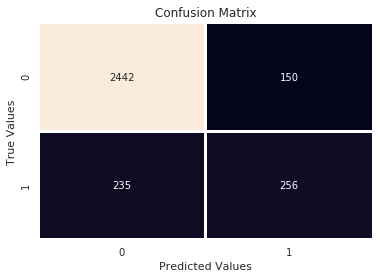

None

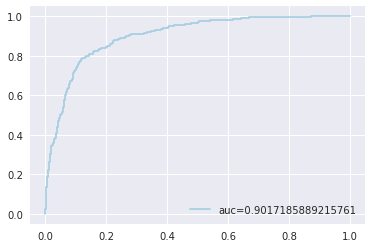

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

lrm_Xdata = df_X.copy() #making our X columns


#getting the values of our x features:

Xlrm = lrm_Xdata.values

#getting the values of our y:
ylrm = df_y.values.ravel() # target



#Splitting data test&train 
X_train, X_test, y_train, y_test= train_test_split(Xlrm, ylrm, test_size=0.25, random_state=123)



#building the Logistic regression model 
lrm = LogisticRegression( max_iter = 2000,random_state=123)#,class_weight={0:0.2,1:0.8})#,random_state=123 )#,penalty='l1')
#lrm = LogisticRegressionCV( )
#fit the model
lrm.fit(X_train, y_train)
#predict the model
y_pred=lrm.predict(X_test)
y_pred_train=lrm.predict(X_train)

print('Classification Report for Classfier Test:')
print(classification_report(y_test, y_pred , zero_division = 0))




confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
#print ('confusion_matrix:' )
#print( confusion_matrix)
print("Accuracy:%.4f" % metrics.accuracy_score(y_test, y_pred))
print ("F1 (weighted): %.4f" % f1_score(y_test, y_pred , average='weighted', zero_division = 0))
print("Precision (weighted): %.4f" % metrics.precision_score(y_test, y_pred , average='weighted', zero_division = 0 ))
print("Recall (weighted): %.4f" % metrics.recall_score(y_test, y_pred,  average='weighted'))

roc_auc = roc_auc_score(y_test, y_pred)
print('AUC' ,roc_auc)
# roc taking from scikit learn website
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#multiclass-settings
y_prob = lrm.predict_proba(X_test)

from sklearn.model_selection import cross_val_score, RepeatedKFold

rkf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)
f1_scores_cv = cross_val_score(lrm,X_train, y_train, scoring='f1', cv=rkf)
roc_auc_cv = cross_val_score(lrm,X_train, y_train, scoring='roc_auc', cv=rkf)

print("model bias (f1-score):", f1_scores_cv.mean())
print("model variance (f1-score):", f1_scores_cv.std())
print("model bias (ROC/AUC):", roc_auc_cv.mean())
print("model variance (ROC/AUC):", roc_auc_cv.std())


sns.heatmap(confusion_matrix,annot=True,
            lw =2,
            cbar=False,
            fmt="d"
           )
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("Confusion Matrix")
display(plt.show())



y_pred_proba = lrm.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()





**Model bias for F1 score is .63 which is not ideal for model validation. We also have a high model variance, .032,  of the F1 score.**<br>

####  Logistic Regression Model 2 :

We then tried oversampling using **SMOTE** from the **imblearn** package to see if the model will perform better with regards to class one.

Classification Report for Classfier Test:
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      2592
           1       0.52      0.79      0.63       491

    accuracy                           0.85      3083
   macro avg       0.74      0.83      0.77      3083
weighted avg       0.89      0.85      0.86      3083

Accuracy:0.8524
F1 (weighted): 0.8637
Precision (weighted): 0.8879
Recall (weighted): 0.8524
AUC 0.8288616391340423
model bias (f1-score): 0.8610995636245898
model variance (f1-score): 0.009676767161159183
model bias (ROC/AUC): 0.9291915080047961
model variance (ROC/AUC): 0.005666253535563961


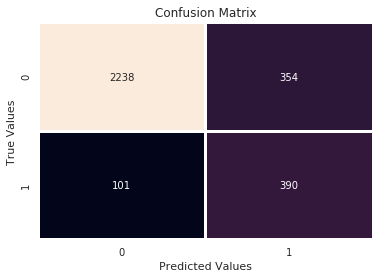

None

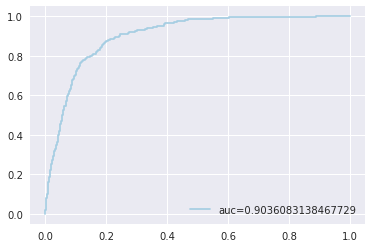

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

lrm_Xdata = df_X.copy() #making our X columns


#getting the values of our x features:
Xlrm = lrm_Xdata.values

#getting the values of our y:
ylrm = df_y.values.ravel() # target



#Splitting data test&train 
X_train, X_test, y_train, y_test= train_test_split(Xlrm, ylrm, test_size=0.25, random_state=123)

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

sm =SMOTE()
X_train_bal, y_train_bal = sm.fit_sample(X_train, y_train)

#building the Logistic regression model 
lrm2 = LogisticRegression( max_iter = 2000,random_state=123)#,class_weight={0:0.2,1:0.8})#,random_state=123 )#,penalty='l1')
#lrm = LogisticRegressionCV( )
#fit the model
lrm2.fit(X_train_bal, y_train_bal)
#predict the model
y_pred=lrm2.predict(X_test)
y_pred_train=lrm2.predict(X_train_bal)

print('Classification Report for Classfier Test:')
print(classification_report(y_test, y_pred , zero_division = 0))




confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
#print ('confusion_matrix:' )
#print( confusion_matrix)
print("Accuracy:%.4f" % metrics.accuracy_score(y_test, y_pred))
print ("F1 (weighted): %.4f" % f1_score(y_test, y_pred , average='weighted', zero_division = 0))
print("Precision (weighted): %.4f" % metrics.precision_score(y_test, y_pred , average='weighted', zero_division = 0 ))
print("Recall (weighted): %.4f" % metrics.recall_score(y_test, y_pred,  average='weighted'))

roc_auc = roc_auc_score(y_test, y_pred)
print('AUC' ,roc_auc)
# roc taking from scikit learn website
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#multiclass-settings
y_prob = lrm2.predict_proba(X_test)

from sklearn.model_selection import cross_val_score, RepeatedKFold

rkf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)
f1_scores_cv = cross_val_score(lrm2,X_train_bal, y_train_bal, scoring='f1', cv=rkf)
roc_auc_cv = cross_val_score(lrm2,X_train_bal, y_train_bal, scoring='roc_auc', cv=rkf)

print("model bias (f1-score):", f1_scores_cv.mean())
print("model variance (f1-score):", f1_scores_cv.std())
print("model bias (ROC/AUC):", roc_auc_cv.mean())
print("model variance (ROC/AUC):", roc_auc_cv.std())


sns.heatmap(confusion_matrix,annot=True,
            lw =2,
            cbar=False,
            fmt="d"
           )
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("Confusion Matrix")
display(plt.show())



y_pred_proba = lrm2.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()



**Looking at the Confusion Matrix, the model with oversampling performed well in predcting class 1 when using all the features. There was an improvement across all metrics relative to the previous testing. <br> Let's try feature selection on top of oversampling <br> Using the SpFtSel package which picked these features :** <br>

```python

best_features_spsa = ['ProductRelated_skew_s', 'TrafficType_dummies_20',
       'OperatingSystems_dummies_8', 'TrafficType_dummies_5',
       'Browser_dummies_12', 'OperatingSystems_dummies_7']

```


####  Logistic Regression Model 3 :

Classification Report for Classfier Test:
              precision    recall  f1-score   support

           0       0.96      0.88      0.91      2592
           1       0.55      0.79      0.65       491

    accuracy                           0.86      3083
   macro avg       0.75      0.83      0.78      3083
weighted avg       0.89      0.86      0.87      3083

Accuracy:0.8625
F1 (weighted): 0.8719
Precision (weighted): 0.8914
Recall (weighted): 0.8625
AUC 0.8331907199969828
model bias (f1-score): 0.8436306860458567
model variance (f1-score): 0.008568960254806106
model bias (ROC/AUC): 0.8839248585559255
model variance (ROC/AUC): 0.007790945877831409


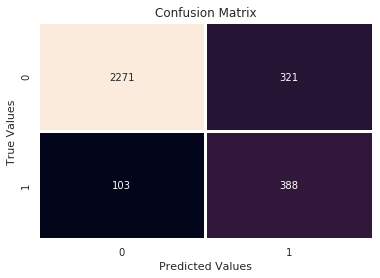

None

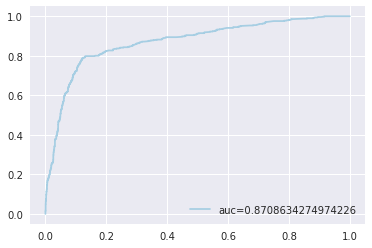

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
#best_features_spsa = ['ProductRelated_skew_s', 'TrafficType_dummies_20',
#       'OperatingSystems_dummies_8', 'TrafficType_dummies_5',
#       'Browser_dummies_12', 'OperatingSystems_dummies_7']
lrm_Xdata = df_X.copy() #making our X columns


#getting the values of our x features:
Xlrm = lrm_Xdata[best_features_spsa].values
#Xlrm= lrm_Xdata[clos_1].values
#Xlrm = lrm_Xdata.values

#getting the values of our y:
ylrm = df_y.values.ravel() # target



#Splitting data test&train 
X_train, X_test, y_train, y_test= train_test_split(Xlrm, ylrm, test_size=0.25, random_state=123)

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
#sm =ADASYN(n_neighbors=20)
sm =SMOTE(k_neighbors=20)
X_train_bal, y_train_bal = sm.fit_sample(X_train, y_train)

#building the Logistic regression model 
lrm3 = LogisticRegression( max_iter = 2000,random_state=123 , C=1.0, dual=False)#,class_weight={0:0.2,1:0.8})#,random_state=123 )#,penalty='l1')
#lrm = LogisticRegressionCV( )
#fit the model
lrm3.fit(X_train_bal, y_train_bal)
#predict the model
y_pred=lrm3.predict(X_test)
y_pred_train=lrm3.predict(X_train_bal)

print('Classification Report for Classfier Test:')
print(classification_report(y_test, y_pred , zero_division = 0))




confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
#print ('confusion_matrix:' )
#print( confusion_matrix)
print("Accuracy:%.4f" % metrics.accuracy_score(y_test, y_pred))
print ("F1 (weighted): %.4f" % f1_score(y_test, y_pred , average='weighted', zero_division = 0))
print("Precision (weighted): %.4f" % metrics.precision_score(y_test, y_pred , average='weighted', zero_division = 0 ))
print("Recall (weighted): %.4f" % metrics.recall_score(y_test, y_pred,  average='weighted'))

roc_auc = roc_auc_score(y_test, y_pred)
print('AUC' ,roc_auc)
# roc taking from scikit learn website
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#multiclass-settings
y_prob = lrm3.predict_proba(X_test)

from sklearn.model_selection import cross_val_score, RepeatedKFold

rkf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)
f1_scores_cv = cross_val_score(lrm3,X_train_bal, y_train_bal, scoring='f1', cv=rkf)
roc_auc_cv = cross_val_score(lrm3,X_train_bal, y_train_bal, scoring='roc_auc', cv=rkf)

print("model bias (f1-score):", f1_scores_cv.mean())
print("model variance (f1-score):", f1_scores_cv.std())
print("model bias (ROC/AUC):", roc_auc_cv.mean())
print("model variance (ROC/AUC):", roc_auc_cv.std())



sns.heatmap(confusion_matrix,annot=True,
            lw =2,
            cbar=False,
            fmt="d"
           )
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("Confusion Matrix")
display(plt.show())



y_pred_proba = lrm3.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()
 
#model bias (f1-score): 0.8610849467755135
#model variance (f1-score): 0.00968024485731688
#model bias (ROC/AUC): 0.9291916719177096
#model variance (ROC/AUC): 0.005666383987484101   
    


**When applying feature selection, the model did not perform better for class 1 but not by much and performed worse for class 0. We have a bias of .84 and AUC of .88 and .007 for the variance. Other model it is .86, which is higher and have a .0096 bias with a higher AUC. Our model performed lower than expected when we used feature selection. We have determined that the package has given us a good start with this model, or we need to do a better job of feature selection**




# 2- Naive Bayes model :
-  No hyperparameters 
-  With oversampling
-  With oversampling and feature selection

####  Naive Bayes Model 1 :

AUC 0.7322326569611024
Accuracy: 0.8537139150178398
Classification Report for Classfier Test:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      2592
           1       0.54      0.55      0.55       491

    accuracy                           0.85      3083
   macro avg       0.73      0.73      0.73      3083
weighted avg       0.86      0.85      0.85      3083

model bias (f1-score): 0.5764820019292225
model variance (f1-score): 0.033292101177834044
model bias (ROC/AUC): 0.8954902276525618
model variance (ROC/AUC): 0.009466019313726093


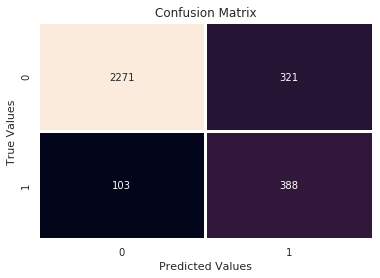

None

In [64]:
#Import Gaussian Naive Bayes model
#from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
#Create a Gaussian Classifier

gnb_Xdata = df_X.copy() #making our X columns


#getting the values of our x features:
#Xlrm = lrm_Xdata[best_features_spsa].values
#X_gnb= gnb_Xdata[clos_1].values
X_gnb = gnb_Xdata.values

#getting the values of our y:
y_gnb = df_y.values.ravel() # target



#Splitting data test&train 
X_train, X_test, y_train, y_test= train_test_split(X_gnb, y_gnb , test_size=0.25, random_state=123)




gnb = BernoulliNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)
from sklearn import metrics
roc_auc = roc_auc_score(y_test, y_pred)
print('AUC' ,roc_auc)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('Classification Report for Classfier Test:')
print(classification_report(y_test, y_pred , zero_division = 0))


y_prob = gnb.predict_proba(X_test)


from sklearn.model_selection import cross_val_score, RepeatedKFold

rkf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)
f1_scores_cv = cross_val_score(gnb,X_train, y_train, scoring='f1', cv=rkf)
roc_auc_cv = cross_val_score(gnb,X_train, y_train, scoring='roc_auc', cv=rkf)

print("model bias (f1-score):", f1_scores_cv.mean())
print("model variance (f1-score):", f1_scores_cv.std())
print("model bias (ROC/AUC):", roc_auc_cv.mean())
print("model variance (ROC/AUC):", roc_auc_cv.std())

sns.heatmap(confusion_matrix,annot=True,
            lw =2,
            cbar=False,
            fmt="d"
           )
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("Confusion Matrix")
display(plt.show())

**Model bias for F1 score is .57 which is not ideal for model validation. We also have a high model variance, .033,  of the F1 score.**<br>



####  Naive Bayes Model 2 :

AUC 0.7987018650524251
Accuracy: 0.818358741485566
Classification Report for Classfier Test:
              precision    recall  f1-score   support

           0       0.95      0.83      0.88      2592
           1       0.46      0.77      0.57       491

    accuracy                           0.82      3083
   macro avg       0.70      0.80      0.73      3083
weighted avg       0.87      0.82      0.84      3083

model bias (f1-score): 0.8762848961842903
model variance (f1-score): 0.007268617684049242
model bias (ROC/AUC): 0.9327810383631973
model variance (ROC/AUC): 0.004896478650631403


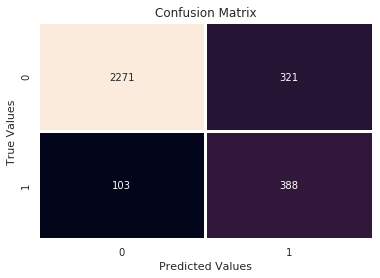

None

In [65]:
#Import Gaussian Naive Bayes model
#from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
#Create a Gaussian Classifier

gnb_Xdata = df_X.copy() #making our X columns


#getting the values of our x features:
#Xlrm = lrm_Xdata[best_features_spsa].values
#X_gnb= gnb_Xdata[clos_1].values
X_gnb = gnb_Xdata.values

#getting the values of our y:
y_gnb = df_y.values.ravel() # target



#Splitting data test&train 
X_train, X_test, y_train, y_test= train_test_split(X_gnb, y_gnb , test_size=0.25, random_state=123)


from imblearn.over_sampling import SMOTE

sm =SMOTE(k_neighbors=20)
X_train_bal, y_train_bal = sm.fit_sample(X_train, y_train)

gnb2 = BernoulliNB()

#Train the model using the training sets
gnb2.fit(X_train_bal, y_train_bal)

#Predict the response for test dataset
y_pred = gnb2.predict(X_test)
from sklearn import metrics
roc_auc = roc_auc_score(y_test, y_pred)
print('AUC' ,roc_auc)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('Classification Report for Classfier Test:')
print(classification_report(y_test, y_pred , zero_division = 0))


y_prob = gnb2.predict_proba(X_test)

from sklearn.model_selection import cross_val_score, RepeatedKFold

rkf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)
f1_scores_cv = cross_val_score(gnb2,X_train_bal, y_train_bal, scoring='f1', cv=rkf)
roc_auc_cv = cross_val_score(gnb2,X_train_bal, y_train_bal, scoring='roc_auc', cv=rkf)

print("model bias (f1-score):", f1_scores_cv.mean())
print("model variance (f1-score):", f1_scores_cv.std())
print("model bias (ROC/AUC):", roc_auc_cv.mean())
print("model variance (ROC/AUC):", roc_auc_cv.std())


sns.heatmap(confusion_matrix,annot=True,
            lw =2,
            cbar=False,
            fmt="d"
           )
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("Confusion Matrix")
display(plt.show())

**Looking at the Confusion Matrix, the model with oversampling performed well in predcting class 1 when using all the features. There was an improvement across all metrics relative to the previous testing. <br> Let's try feature selection on top of oversampling <br> Using the SpFtSel package which picked these features :** <br>



#### Naive Bayes Model 3 :

AUC 0.8333836212315506
Accuracy: 0.8627959779435614
Classification Report for Classfier Test:
              precision    recall  f1-score   support

           0       0.96      0.88      0.91      2592
           1       0.55      0.79      0.65       491

    accuracy                           0.86      3083
   macro avg       0.75      0.83      0.78      3083
weighted avg       0.89      0.86      0.87      3083

model bias (f1-score): 0.8447758632869841
model variance (f1-score): 0.010098347887190448
model bias (ROC/AUC): 0.8616238054251331
model variance (ROC/AUC): 0.008780599943640598


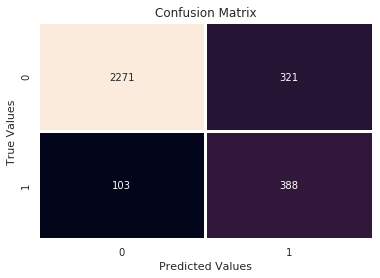

In [66]:
#Import Gaussian Naive Bayes model
#from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
#Create a Gaussian Classifier

gnb_Xdata = df_X.copy() #making our X columns


#getting the values of our x features:
X_gnb = gnb_Xdata[best_features_spsa].values
#X_gnb= gnb_Xdata[clos_1].values
#X_gnb = gnb_Xdata.values

#getting the values of our y:
y_gnb = df_y.values.ravel() # target



#Splitting data test&train 
X_train, X_test, y_train, y_test= train_test_split(X_gnb, y_gnb , test_size=0.25, random_state=123)

from imblearn.over_sampling import SMOTE

sm =SMOTE(k_neighbors=20)
X_train_bal, y_train_bal = sm.fit_sample(X_train, y_train)

gnb3 = BernoulliNB()

#Train the model using the training sets
gnb3.fit(X_train_bal, y_train_bal)

#Predict the response for test dataset
y_pred = gnb3.predict(X_test)
from sklearn import metrics
roc_auc = roc_auc_score(y_test, y_pred)
print('AUC' ,roc_auc)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('Classification Report for Classfier Test:')
print(classification_report(y_test, y_pred , zero_division = 0))


y_prob = gnb3.predict_proba(X_test)

from sklearn.model_selection import cross_val_score, RepeatedKFold

rkf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)
f1_scores_cv = cross_val_score(gnb3,X_train_bal, y_train_bal, scoring='f1', cv=rkf)
roc_auc_cv = cross_val_score(gnb3,X_train_bal, y_train_bal, scoring='roc_auc', cv=rkf)

print("model bias (f1-score):", f1_scores_cv.mean())
print("model variance (f1-score):", f1_scores_cv.std())
print("model bias (ROC/AUC):", roc_auc_cv.mean())
print("model variance (ROC/AUC):", roc_auc_cv.std())




sns.heatmap(confusion_matrix,annot=True,
            lw =2,
            cbar=False,
            fmt="d"
           )
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("Confusion Matrix")
plt.show()

__When applying feature selection, we had beter performance across all metrics. We have a bias of .84 and AUC of .88 and .007 for the variance.__

# 3- DecisionTreeClassifier :
- Simple
- With oversampling 
- With oversampling and feature selection


####  Decision Tree Model 1 :

Training Metrics
Accuracy: 0.8981291229587974
Precision: 0.6652748782185108
Recall: 0.6746647847565279
Test Metrics
Accuracy: 0.8790139474537788
Precision: 0.6170634920634921
Recall: 0.6334012219959266
Test Classification Report
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2592
           1       0.62      0.63      0.63       491

    accuracy                           0.88      3083
   macro avg       0.77      0.78      0.78      3083
weighted avg       0.88      0.88      0.88      3083

AUC 0.7794706727263584
model bias (f1-score): 0.6398542583377341
model variance (f1-score): 0.04239684449259821
model bias (ROC/AUC): 0.9149815043285804
model variance (ROC/AUC): 0.007920844522886501


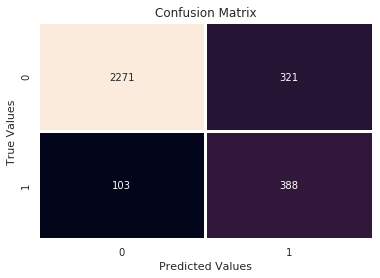

In [67]:
#Without oversampling

from sklearn.tree import DecisionTreeClassifier

dt_Xdata = df_X.copy() #making our X columns


#getting the values of our x features:
#Xdt = dt_Xdata[best_features_spsa].values
#Xdt= dt_Xdata[cols_2].values
Xdt = dt_Xdata.values

#getting the values of our y:
y_dt = df_y.values.ravel() # target



#Splitting data test&train 
X_train, X_test, y_train, y_test= train_test_split(Xdt, y_dt , test_size=0.25, random_state=123)



dt = DecisionTreeClassifier(max_depth=3 )

dt.fit(X_train, y_train)

dt_train_pred2 = dt.predict(X_train)

dt_test_pred2 = dt.predict(X_test)

from sklearn.metrics import accuracy_score,precision_score,recall_score

print("Training Metrics")
print("Accuracy:",accuracy_score(y_train,dt_train_pred2  ))
print("Precision:",precision_score(y_train,dt_train_pred2, zero_division = 0))
print("Recall:",recall_score(y_train,dt_train_pred2, zero_division = 0))


print("Test Metrics")
print("Accuracy:",accuracy_score(y_test,dt_test_pred2))
print("Precision:",precision_score(y_test,dt_test_pred2 , zero_division = 0))
print("Recall:",recall_score(y_test,dt_test_pred2, zero_division = 0))


from sklearn.metrics import classification_report
print('Test Classification Report')
print(classification_report(y_test,dt_test_pred2, zero_division = 0))

from sklearn.metrics import roc_curve, auc
roc_auc = roc_auc_score(y_test, dt_test_pred2)
print('AUC' ,roc_auc)




rkf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)
f1_scores_cv = cross_val_score(dt,X_train, y_train, scoring='f1', cv=rkf)
roc_auc_cv = cross_val_score(dt,X_train, y_train, scoring='roc_auc', cv=rkf)

print("model bias (f1-score):", f1_scores_cv.mean())
print("model variance (f1-score):", f1_scores_cv.std())
print("model bias (ROC/AUC):", roc_auc_cv.mean())
print("model variance (ROC/AUC):", roc_auc_cv.std())

sns.heatmap(confusion_matrix,annot=True,
            lw =2,
            cbar=False,
            fmt="d"
           )
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("Confusion Matrix")
plt.show()



**Model bias for F1 score is .64 which is not ideal for model validation. We also have a high model variance, .042, of the F1 score.**<br>

####  Decision Tree Model 2 :

Training Metrics
Accuracy: 0.8815453384418902
Precision: 0.8976440835884467
Recall: 0.8613026819923372
Test Metrics
Accuracy: 0.8673370094064223
Precision: 0.5619335347432024
Recall: 0.7576374745417516
AUC 0.8228773792461844
Test Classification Report
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      2592
           1       0.56      0.76      0.65       491

    accuracy                           0.87      3083
   macro avg       0.76      0.82      0.78      3083
weighted avg       0.89      0.87      0.87      3083

model bias (f1-score): 0.8786332005851828
model variance (f1-score): 0.008249308480332796
model bias (ROC/AUC): 0.9371425100697337
model variance (ROC/AUC): 0.006223248828685162


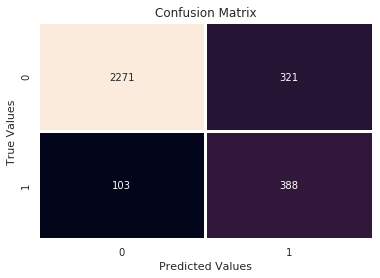

In [68]:
#With oversampling

from sklearn.tree import DecisionTreeClassifier

dt_Xdata = df_X.copy() #making our X columns


#getting the values of our x features:
#Xdt = dt_Xdata[best_features_spsa].values
#Xdt= dt_Xdata[cols_2].values
Xdt = dt_Xdata.values

#getting the values of our y:
y_dt = df_y.values.ravel() # target



#Splitting data test&train 
X_train, X_test, y_train, y_test= train_test_split(Xdt, y_dt , test_size=0.25, random_state=123)

from imblearn.over_sampling import SMOTE

sm =SMOTE(k_neighbors=20)
X_train_bal, y_train_bal = sm.fit_sample(X_train, y_train)

dt2 = DecisionTreeClassifier(max_depth=3 )

dt2.fit(X_train_bal, y_train_bal)

dt_train_pred2 = dt2.predict(X_train_bal)

dt_test_pred2 = dt2.predict(X_test)

from sklearn.metrics import accuracy_score,precision_score,recall_score

print("Training Metrics")
print("Accuracy:",accuracy_score(y_train_bal,dt_train_pred2 , ))
print("Precision:",precision_score(y_train_bal,dt_train_pred2, zero_division = 0))
print("Recall:",recall_score(y_train_bal,dt_train_pred2, zero_division = 0))


print("Test Metrics")
print("Accuracy:",accuracy_score(y_test,dt_test_pred2))
print("Precision:",precision_score(y_test,dt_test_pred2 , zero_division = 0))
print("Recall:",recall_score(y_test,dt_test_pred2, zero_division = 0))

roc_auc = roc_auc_score(y_test, dt_test_pred2)
print('AUC' ,roc_auc)
from sklearn.metrics import classification_report
print('Test Classification Report')
print(classification_report(y_test,dt_test_pred2, zero_division = 0))

from sklearn.metrics import roc_curve, auc






rkf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)
f1_scores_cv = cross_val_score(dt2,X_train_bal, y_train_bal, scoring='f1', cv=rkf)
roc_auc_cv = cross_val_score(dt2,X_train_bal, y_train_bal, scoring='roc_auc', cv=rkf)

print("model bias (f1-score):", f1_scores_cv.mean())
print("model variance (f1-score):", f1_scores_cv.std())
print("model bias (ROC/AUC):", roc_auc_cv.mean())
print("model variance (ROC/AUC):", roc_auc_cv.std())

sns.heatmap(confusion_matrix,annot=True,
            lw =2,
            cbar=False,
            fmt="d"
           )
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("Confusion Matrix")
plt.show()

**Model bias for F1 score is .87 which is not ideal for model validation. We also have a high model variance, .94,  of the F1 score.**<br>

####  Decision Tree Model 3 :

Training Metrics
Accuracy: 0.852234993614304
Precision: 0.8825242718446602
Recall: 0.8126436781609195
Test Metrics
Accuracy: 0.8640934155043789
Precision: 0.5511363636363636
Recall: 0.790224032586558
Test Classification Report
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      2592
           1       0.55      0.79      0.65       491

    accuracy                           0.86      3083
   macro avg       0.75      0.83      0.78      3083
weighted avg       0.89      0.86      0.87      3083

Roc -Auc Curve 0.8341552261698223
model bias (f1-score): 0.8439672528376587
model variance (f1-score): 0.007940720230354642
model bias (ROC/AUC): 0.9007114282851755
model variance (ROC/AUC): 0.0071002980129334


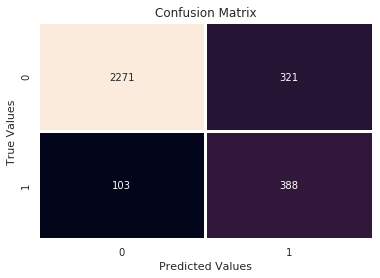

In [69]:
#With oversampling and feature selection

from sklearn.tree import DecisionTreeClassifier

dt_Xdata = df_X.copy() #making our X columns

best_features_dt = [  
     'average_BounceRates/ExitRates_skew_s', 'PageValues_skew_s' ,'VisitorType_dummies_New_Visitor',
 'Weekend_binary']
#getting the values of our x features:
Xdt = dt_Xdata[best_features_spsa].values
Xdt= dt_Xdata[best_features_dt].values
#Xdt = dt_Xdata.values

#getting the values of our y:
y_dt = df_y.values.ravel() # target



#Splitting data test&train 
X_train, X_test, y_train, y_test= train_test_split(Xdt, y_dt , test_size=0.25, random_state=123)

from imblearn.over_sampling import SMOTE

sm =SMOTE()
X_train_bal, y_train_bal = sm.fit_sample(X_train, y_train)


dtc = DecisionTreeClassifier(max_depth=5,min_samples_split=40)

dtc.fit(X_train_bal,y_train_bal)

dt_train_pred3 = dtc.predict(X_train_bal)

dt_test_pred3 = dtc.predict(X_test)

from sklearn.metrics import accuracy_score,precision_score,recall_score

print("Training Metrics")
print("Accuracy:",accuracy_score(y_train_bal,dt_train_pred3))
print("Precision:",precision_score(y_train_bal,dt_train_pred3))
print("Recall:",recall_score(y_train_bal,dt_train_pred3))


print("Test Metrics")
print("Accuracy:",accuracy_score(y_test,dt_test_pred3))
print("Precision:",precision_score(y_test,dt_test_pred3))
print("Recall:",recall_score(y_test,dt_test_pred3))


from sklearn.metrics import classification_report
print('Test Classification Report')
print(classification_report(y_test,dt_test_pred3))
#print('Test Classification Report')
#print(classification_report(y_train_bal,dt_train_pred3))
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, dt_test_pred3)
roc_auc = auc(false_positive_rate, true_positive_rate)

print('Roc -Auc Curve',roc_auc)

y_prob = dtc.predict_proba(X_test)



rkf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)
f1_scores_cv = cross_val_score(dtc,X_train_bal, y_train_bal, scoring='f1', cv=rkf)
roc_auc_cv = cross_val_score(dtc,X_train_bal, y_train_bal, scoring='roc_auc', cv=rkf)


print("model bias (f1-score):", f1_scores_cv.mean())
print("model variance (f1-score):", f1_scores_cv.std())
print("model bias (ROC/AUC):", roc_auc_cv.mean())
print("model variance (ROC/AUC):", roc_auc_cv.std())

sns.heatmap(confusion_matrix,annot=True,
            lw =2,
            cbar=False,
            fmt="d"
           )
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("Confusion Matrix")
plt.show()

**When applying oversampling and feature selection, it performed better than our initial model. The model bias for F1 score is .84, high model variance of .007 of the F1 score.**<br>

__changeing the hyperparameters to max_depth=5,min_samples_split=40 and doing feature selection gave us the best model.__

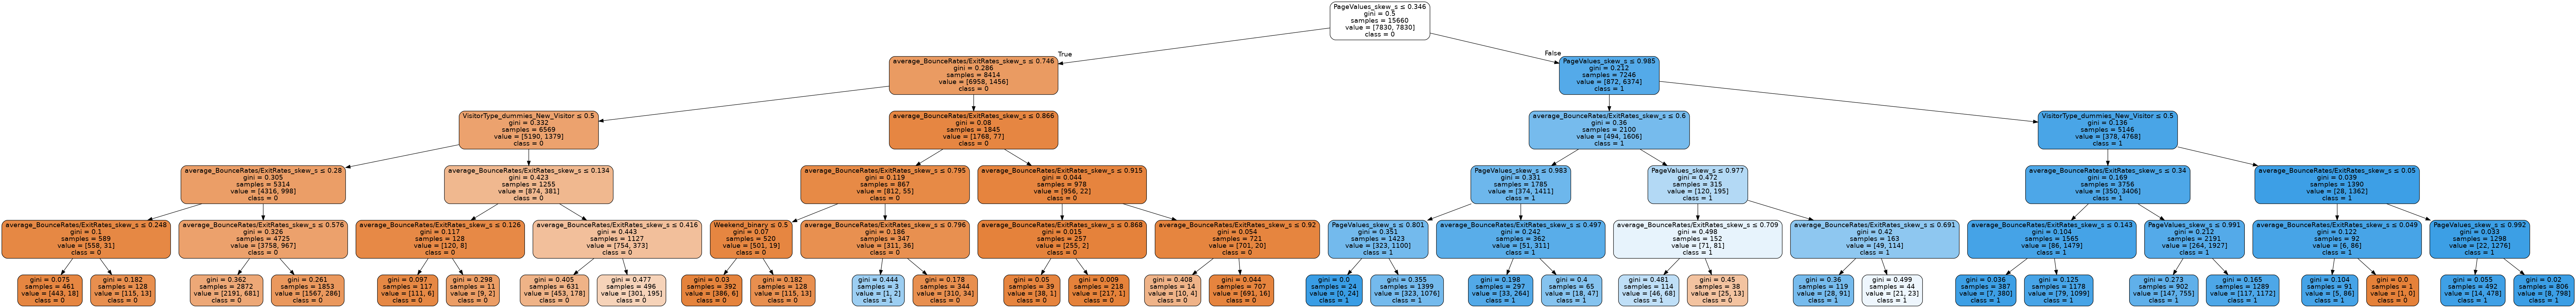

In [73]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names =best_features_dt,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('shopper_tree.png')
Image(graph.create_png())

In [74]:
graph = graphviz.Source(dot_data)
graph

NameError: name 'graphviz' is not defined

# Next Steps

- The three of us will each take one of the three advanced models and continue to work on those ( SVM ,Random Forest, XGBoost)
- Continue to build up commentary on decision making and analysis of outcomes
- Put together final power point presentation